In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns

## Creating graph using dictionary

'A' it connects with 'B'
'A' it connects with 'C'
'A' it connects with 'D'
'B' it connects with 'D'
'B' it connects with 'E'
'C' it connects with 'E'
'C' it connects with 'F'
'D' it connects with 'B'
'D' it connects with 'G'
'E' it connects with 'B'
'E' it connects with 'C'
'F' it connects with 'C'
'F' it connects with 'G'
'G' it connects with 'D'
'G' it connects with 'F'


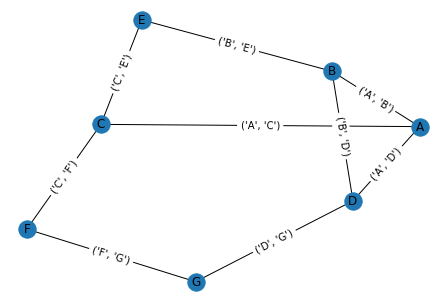

In [10]:
G = nx.Graph()

# Key is the main node, then value are in list of nodes to which it connects. A connect with B and C
graph = {
    "A":["B","C", "D"],
    "B":["D","E"],
    "C":["E","F"],
    "D":["B","G"],
    "E":["B","C"],
    "F":["C","G"],
    "G":["D","F"]
}

x = 10   # Just a plug to create a weight

for vertex, edges in graph.items():
    G.add_node(str(vertex))               # G.add_node("%s" % vertex)
    x+=2   # Just a plug for weight
    
    for edge in edges:
        # Get the nodes from the edge connections
        G.add_node(str(edge))            # G.add_node("%s" % edge)
        
        # Create edges with a weight
        # print(vertex, edge, x)
        G.add_edge(str(vertex), str(edge), weight = x)   #G.add_edge("%s" % vertex, "%s" % edge, weight = x)
        print("'%s' it connects with '%s'" % (vertex, edge))

# Create positions of all nodes and save them
pos = nx.spring_layout(G)

# Draw the graph according to node positions
nx.draw(G, pos, with_labels=True)

# Create edge labels
labels = {e: str(e) for e in G.edges}

# Draw edge labels according to node positions
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [33]:
G.nodes()  # This is a view

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G'))

In [32]:
list(G.nodes())[0:5] # Need to use list to access the elements

['A', 'B', 'C', 'D', 'E']

In [11]:
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 12}), ('A', 'C', {'weight': 12}), ('A', 'D', {'weight': 12}), ('B', 'D', {'weight': 18}), ('B', 'E', {'weight': 20}), ('C', 'E', {'weight': 20}), ('C', 'F', {'weight': 22}), ('D', 'G', {'weight': 24}), ('F', 'G', {'weight': 24})])

In [35]:
nx.shortest_path(G, "A", "F")

['A', 'C', 'F']

In [30]:
from collections import deque

def BFS(G, s) -> dict:
    """ Runs Bread First Search to find paths distance from source node ‘s’ to all nodes.
        Returns the shortest path dictionary {Node:distance}. It starts with source node and distance zero."""
    paths = {}
    Q = deque() 
    paths[s] = 0    # dictionary starts with the source node with zero distance 
    Q.append(s)     # adds the source to  queue to seed the search for paths to other nodes using its neighbors
    
    while len(Q) != 0:
        node = Q.popleft()                    
        for nbr in G.neighbors(node):         # iterate thru the neighbors of 'node'
            if nbr not in paths:              # ‘nbr’ is unvisited
                paths[nbr] = paths[node] + 1  # adding 1 to the latest node we calculated 
                Q.append(nbr)                 # add ‘nbr’ to the queue so that distance can be calculated in the future
    return paths

In [31]:
BFS(G, "B")

{'B': 0, 'A': 1, 'D': 1, 'E': 1, 'C': 2, 'G': 2, 'F': 3}

In [17]:
def path_exists(node1, node2, G) -> bool:
    """
    This function checks whether a path exists between two nodes (node1,
    node2) in graph G.
    """

    visited_nodes = set()
    queue = [node1]

    while len(queue) > 0:
        node = queue.pop()
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            return True
        else:
            visited_nodes.add(node)
            nbrs = [n for n in neighbors if n not in visited_nodes]
            queue = nbrs + queue

    return False

In [18]:
path_exists("A", "F", G)

True

In [ ]:
def path_exists_for_loop(node1, node2, G):
    """
    This function checks whether a path exists between two nodes (node1,
    node2) in graph G.
    Special thanks to @ghirlekar for suggesting that we keep track of the
    "visited nodes" to prevent infinite loops from happening. This also
    removes the need to remove nodes from queue.
    Reference: https://github.com/ericmjl/Network-Analysis-Made-Simple/issues/3
    With thanks to @joshporter1 for the second bug fix. Originally there was
    an extraneous "if" statement that guaranteed that the "False" case would
    never be returned - because queue never changes in shape. Discovered at
    PyCon 2017.
    With thanks to @chendaniely for pointing out the extraneous "break".
    If you would like to see @dgerlanc's implementation, see
    https://github.com/ericmjl/Network-Analysis-Made-Simple/issues/76
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            return True
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

    return False

In [ ]:
def path_exists_deque(node1, node2, G):
    """An alternative implementation."""
    from collections import deque

    visited_nodes = set()
    queue = deque([node1])

    while len(queue) > 0:
        node = queue.popleft()
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            return True
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

    return False


def plot_path_with_neighbors(G, n1, n2):
    """Plot path while also including neighbors of nodes along path."""
    path = nx.shortest_path(G, n1, n2)

    nodes = [*path]
    for node in path:
        nodes.extend(list(G.neighbors(node)))
    nodes = list(set(nodes))

    colors = []
    for n in nodes:
        if n not in path:
            colors.append("blue")
        else:
            colors.append("red")

    nx.draw(G.subgraph(nodes), with_labels=False, node_color=colors)


def plot_degree_betweenness(G):
    """Plot scatterplot between degree and betweenness centrality."""
    bc = pd.Series(nx.betweenness_centrality(G))
    dc = pd.Series(nx.degree_centrality(G))

    df = pd.DataFrame(dict(bc=bc, dc=dc))
    ax = df.plot(x="dc", y="bc", kind="scatter")
    ax.set_ylabel("Betweenness\nCentrality")
    ax.set_xlabel("Degree Centrality")
    sns.despine()